### Problem description

You just got some contract work with an Ecommerce company based in New York City that sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want. The company is trying to decide whether to focus their efforts on their mobile app experience or their website. 


### Objectives

1 - Understand which features are associated with increase in sales

2 - Understand which experience (app or website) has higher inpact on sales

### Dataset Description

We'll work with the Ecommerce Customers csv file from the company. It has Customer info, suchas Email, Address, and their color Avatar. Then it also has numerical value columns:

* Avg. Session Length: Average session of in-store style advice sessions.
* Time on App: Average time spent on App in minutes
* Time on Website: Average time spent on Website in minutes
* Length of Membership: How many years the customer has been a member.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score

In [3]:
customers_df = pd.read_csv('C:/Users/Guilherme/Datasets/Ecommerce Customers.csv')

In [4]:
customers_df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [5]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [6]:
customers_df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


### Exploratory Data Analysis (EDA)

First, let´s take a deeper look on the data.

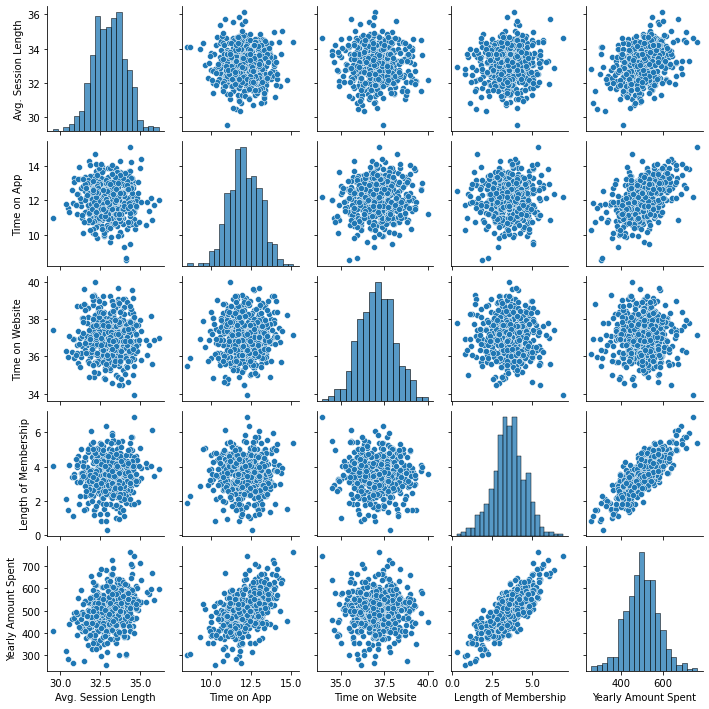

In [7]:
# plot pairwise relationships using pairplot

sns.pairplot(customers_df, height=2)

From the scatterplots it seams that the highest correlation with Yearly Amount Spent is Length of Membership, which is no surprise. Looking at the other scatterplots, there seems to be some correlation (although weaker) between the Time on App and Avg. Session Length features with Yearly Amount Spent. The Time on Website features does not appear to have any correlation at all with Amount Spent.

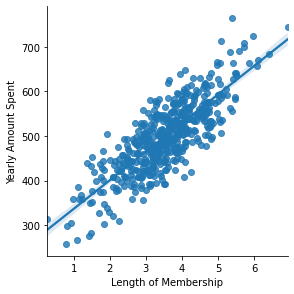

In [8]:
# regression model of Yearly Amount Spent vs. Length of Membership 

sns.lmplot(x='Length of Membership', y='Yearly Amount Spent', data=customers_df, height=4)

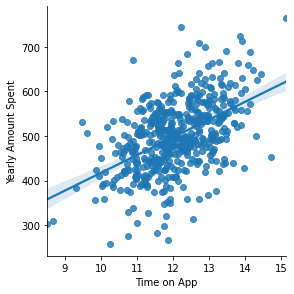

In [9]:
# regression model of Yearly Amount Spent vs. Time on App

sns.lmplot(x='Time on App', y='Yearly Amount Spent', data=customers_df, height=4)

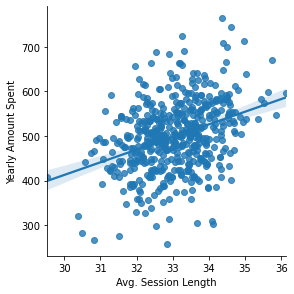

In [10]:
# regression model of Yearly Amount Spent vs. Avg. Session Length

sns.lmplot(x='Avg. Session Length', y='Yearly Amount Spent', data=customers_df, height=4)

## Create and Train the Model

First, let's split the data into training and testing sets.

In [11]:
customers_df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [12]:
# split the numerical features into the X (independent variables) and y (dependent variable)

X = customers_df[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]
y = customers_df['Yearly Amount Spent']

In [13]:
# separete the data into training and teting sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

Now, it's time to train the model

In [14]:
lm = LinearRegression()

In [15]:
lm.fit(X_train, y_train)

LinearRegression()

In [16]:
# check the coeficient for each feature 

coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


The feature (X) that most impacts the Yearly Amount Spent (y) is Length of Membership, since *holding all other features fixed*, a 1 unit increase on this feature is associated with an increase of $61.28 Yearly Amount Spent.

### Model Evaluation

Let's see how good is our model in predicting the test values.

In [17]:
# predict y_test

prediction = lm.predict(X_test)

<AxesSubplot:xlabel='Yearly Amount Spent'>

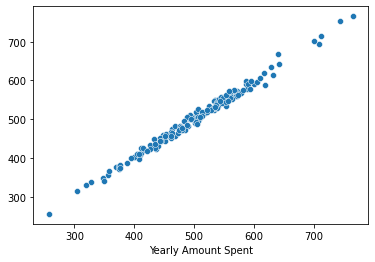

In [18]:
# plot the prediction vs the real y values

sns.scatterplot(x=y_test, y=prediction)

It looks like a good fit!

In [19]:
# calculate the model errors

print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))
print('R^2 score:', r2_score(y_test, prediction))

MAE: 7.228148653430853
MSE: 79.81305165097487
RMSE: 8.933815066978656
R^2 score: 0.9890046246741233


The R² score shows us that over 98% of the dependent variable variation can be explained by our linear model.

Next, lets check for bias in our model.

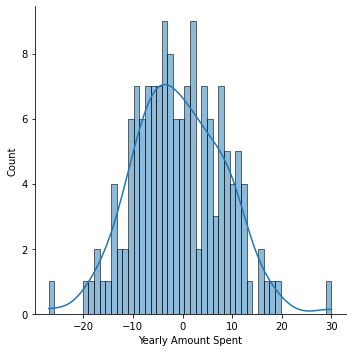

In [20]:
# check if the residuals look normally distributed

sns.displot((y_test-prediction), bins=50, kde='True')

<AxesSubplot:ylabel='Yearly Amount Spent'>

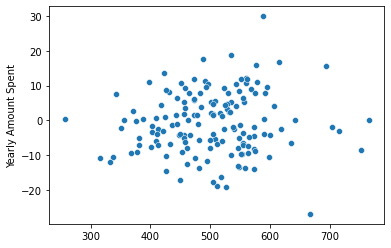

In [21]:
# check if residuals are randomly scattered around zero

sns.scatterplot(x=prediction, y=y_test-prediction)

Everything seems fine!

## Conclusion

Our model did a good job predicting the Yearly Sales Amount on the test data, with over 98% of the dependent variable variability being explained by the independent variables collectvelly.

By analasing the coeficients, the features that impacted the most on the prediction were, in order of magnitude:

1 - Length of Membership: 1 unit increase is associated with an increase of $61.28

2 - Time on App: 1 unit increase is associated with an increase of $38.59

3 - Avg. Session Length: 1 unit increase is associated with an increase of $25.98

4 - Time on Website: 1 unit increase is associated with an increase of $0.19

Regarding the e-commerce question "Should we focus energy on the Website or the App?", the answer would be the app. This is the case since, holding all other features fixed, a 1 unit increase in Time on App is associated with an *increase of $38.59*. On the other hand, Time on Website is not relevantly associated with Yearly Amount Spent.